# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
# from mlagents_envs.environment import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("cuda avail:",torch.cuda.is_available())
print("cuda devices:",torch.cuda.device_count())
# torch.cuda.current_device()

print("torch.version:",torch.__version__)
print("torch.version.cuda:",torch.version.cuda)

print("distributed.is_available:",torch.distributed.is_available())
print("is_mpi_available:",torch.distributed.is_mpi_available())
print("is_nccl_available:",torch.distributed.is_nccl_available())

print(torch.cuda.get_arch_list())

cuda avail: True
cuda devices: 1
torch.version: 1.10.2+cu113
torch.version.cuda: 11.3
distributed.is_available: True
is_mpi_available: False
is_nccl_available: False
['sm_37', 'sm_50', 'sm_60', 'sm_61', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'compute_37']


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [3]:
import psutil
num_cpus = psutil.cpu_count(logical=True)
num_gpus = torch.cuda.device_count()
print("CPUs:{} GPUs:{}".format(num_cpus,num_gpus))

CPUs:12 GPUs:1


In [4]:
f = 'Reacher_Windows_20'
env = UnityEnvironment(file_name='{}/Reacher'.format(f), seed=1)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [5]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [6]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -7.98051071e+00 -1.00000000e+00
  5.58052063e-01  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -5.48525572e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [7]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.19299999568611384


When finished, you can close the environment.

In [7]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

## Learning Algorithm
I use the A2C: Advantage Actor-Critic method

the best Hyperparameters I could find:
```
{
'rollout_length': 8,
'discount': 0.9751201238174458,
'gradient_clip': 7,
'lr': 1.0802107431577493e-05,
'gae_tau': 0.9964673379102222,
'entropy_weight': 0.0015039861493695169,
'use_gae': False
}
```
The agent definition is in the file `tools.py` in `a2c_feature` function

the A2C agent core learning logic is in the `agent/A2C.py` file.

How does it work:
The `a2c_feature` function create a config object
then runs the multy agent brain function `brain_multy` from `tools.py`


In [8]:
import tools as ts
from deep_rl import *

The barrier for solving the second version of the environment is slightly different, to take into account the presence of many agents.  
In particular, your agents must get an average score of +30 (over 100 consecutive episodes, and over all agents). Specifically,

In [9]:
# select cpu
select_device(-1)
config = ts.a2c_feature(state_size,action_size,brain_name,env)

# Hyper parameters
config.discount = 0.9751201238174458
config.use_gae = False
config.gae_tau = 0.9964673379102222
config.entropy_weight = 0.0015039861493695169
config.rollout_length = 8
config.gradient_clip = 7
config.lr = 1.0802107431577493e-05
config.fc1 = 64
config.fc2 = 64

config.num_workers = num_agents

config.eval_episodes = 450
config.scores_window = 100
scores,reward,done = config.brain_fn(config,0)

Start[0]	rout_L:8	lr:0.00001080	G_tau:0.99646734	e_W:0.00150399	G:0.97512012	Clip:7	G_use:False	
Episode[0] 100	rout_L:8	lr:0.00001080	G_tau:0.99646734	e_W:0.00150399	G:0.97512012	Clip:7	G_use:False	 a-Average Score: 3.09
Episode[0] 200	rout_L:8	lr:0.00001080	G_tau:0.99646734	e_W:0.00150399	G:0.97512012	Clip:7	G_use:False	 a-Average Score: 8.26
Episode[0] 300	rout_L:8	lr:0.00001080	G_tau:0.99646734	e_W:0.00150399	G:0.97512012	Clip:7	G_use:False	 a-Average Score: 22.35
Episode[0] 346	rout_L:8	lr:0.00001080	G_tau:0.99646734	e_W:0.00150399	G:0.97512012	Clip:7	G_use:False	 a-Average Score: 32.03
Environment[0] solved in 246 episodes!	rout_L:8	lr:0.00001080	G_tau:0.99646734	e_W:0.00150399	G:0.97512012	Clip:7	G_use:False	 Average Score: 32.03


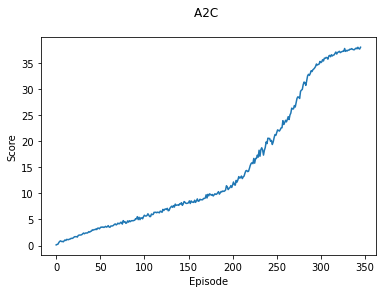

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
plt.title("A2C \n{}".format(st))
plt.show()

In [12]:
config = ts.a2c_feature(state_size,action_size,brain_name,env)
agent = config.agent_fn(config)
agent.network.load_state_dict(torch.load('checkpoint_0_final.pth'))

<All keys matched successfully>

In [13]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    prediction = agent.act(states)
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = (prediction['action']).cpu().detach().numpy()
    # actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 37.57999916002154


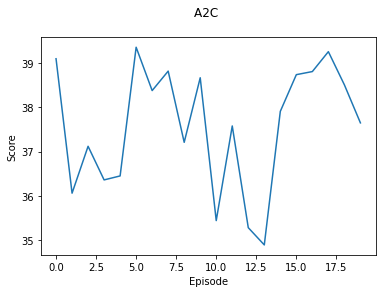

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode')
st = ''
plt.title("A2C \n{}".format(st))
plt.show()

In [15]:
env.close()

## Future works to improve the performance of the agent
- increase the Actor Critic network layers to more than 3
- try other methods REINFORCE, TNPG, RWR, REPS, TRPO, CEM, CMA-ES

I tried DDPG in `initConf_ddpg` and other TD3 `initConf_td3` single agent methods but with no luck. They barely reached reward 1.0.
Even the `ddpg2/ddpg_agent.py` which is from the `ddpg-pendulum` Udacity project scored around 1.0
